In [20]:
import os
import sys

os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['PYTHONIOENCODING'] = 'utf-8'

import matplotlib.pyplot as plt
import pathlib
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow import keras

#sys.stdout.reconfigure(encoding='utf-8')
#sys.stderr.reconfigure(encoding='utf-8')

size_tuple = (150,150)
epochs = 50

In [21]:
categorias = []
labels = []
imagenes  = []

In [22]:
categorias =  [archivo for archivo in os.listdir("Imagenes") if not archivo.startswith('.')]
print(categorias)

['Boca', 'Estudiantes', 'Gimnasia', 'Independiente', 'Racing', 'River', 'San Lorenzo', 'Velez']


In [23]:
x=0
for directorio in categorias:
    imagenes_dir = [imagen for imagen in os.listdir('Imagenes/'+directorio) if not imagen.startswith('.')]
    for imagen in imagenes_dir:
        img = Image.open('Imagenes/'+directorio+'/'+imagen).resize(size_tuple)
        img = np.asarray(img)
        imagenes.append(img)
        labels.append(x)
    x += 1

In [24]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]


In [25]:
imagenes=np.asanyarray(imagenes)
imagenes.shape
imagenes = imagenes[:,:,:,0]

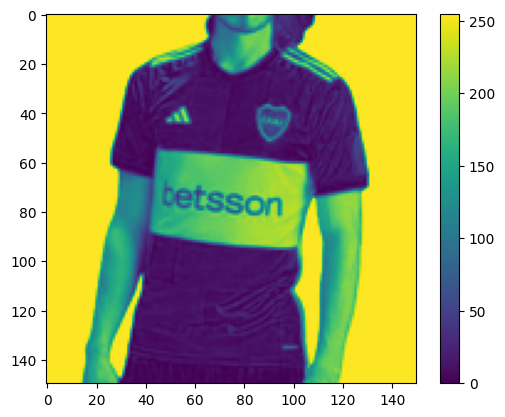

In [26]:
plt.figure()
plt.imshow(imagenes[7])
plt.colorbar()
plt.grid(False)
plt.show()

In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=size_tuple),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0,2),
    tf.keras.layers.Dense(len(categorias),activation='softmax')
])

In [28]:
model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [29]:
labels = np.array(labels)

In [30]:
history = model.fit(imagenes, labels, epochs=epochs)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.1400 - loss: 4650.0405
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0907 - loss: 9322.6289 
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.1328 - loss: 4882.9648
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2445 - loss: 2164.1016
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3411 - loss: 1148.9767
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3070 - loss: 1407.7371
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2692 - loss: 1208.8052
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4127 - loss: 743.3860
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3404 - loss: 660.3001
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3638 - loss: 427.0562
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5785 - loss: 361.9391
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - acc

In [31]:
correcto = 0
incorrecto = 0
root_dir = 'Validacion' 

for subdir, dirs, files in os.walk(root_dir):
    for file in files:
        if not file.startswith('.'):
            im = Image.open(os.path.join(subdir, file)).resize(size_tuple)
            im = np.asarray(im)
            im = im[:,:,0]
            im = np.asarray([im])
            test=im
            predicciones = model.predict(test)  
            print(categorias[np.argmax(predicciones[0])])
            actual_categoria = os.path.basename(subdir)
            if(categorias[np.argmax(predicciones[0])] == actual_categoria):
                correcto += 1
            else:
                incorrecto += 1

print('Validaciones Correctas: '+ str(correcto))
print('Validaciones Incorrectas: '+ str(incorrecto))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Boca
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Boca
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Boca
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Estudiantes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Estudiantes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Estudiantes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Gimnasia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Gimnasia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Gimnasia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Independiente
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Independiente
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Estudiantes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Gimnasia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Boca
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Estudiantes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Estudiantes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Independiente
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Independiente
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Gimnasia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Velez
Validaciones Correctas: 12
Validaciones I

In [32]:
nombre_imagen_de_prueba = os.listdir("Prediccion")[0]
imagen_prueba = "Prediccion/" + nombre_imagen_de_prueba
im = Image.open(imagen_prueba).resize(size_tuple)
im = np.asarray(im)
im = im[:,:,0]
im = np.asarray([im])
im.shape
test=im

In [33]:
prediccion = model.predict(test)  
print(prediccion)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0. 1. 0. 0. 0. 0. 0. 0.]]


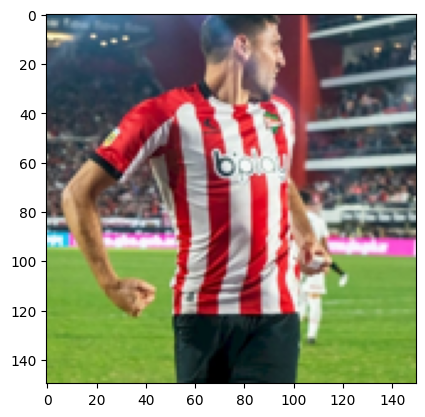

In [34]:
img = Image.open(imagen_prueba).resize(size_tuple)
plt.figure()
plt.imshow(img)
plt.show()

In [35]:
categorias[np.argmax(prediccion[0])]

'Estudiantes'

In [36]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 22500)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     2,880,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,643,482 (32.97 MB)

 Trainable params: 2,881,160 (10.99 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,762,322 (21.98 MB)

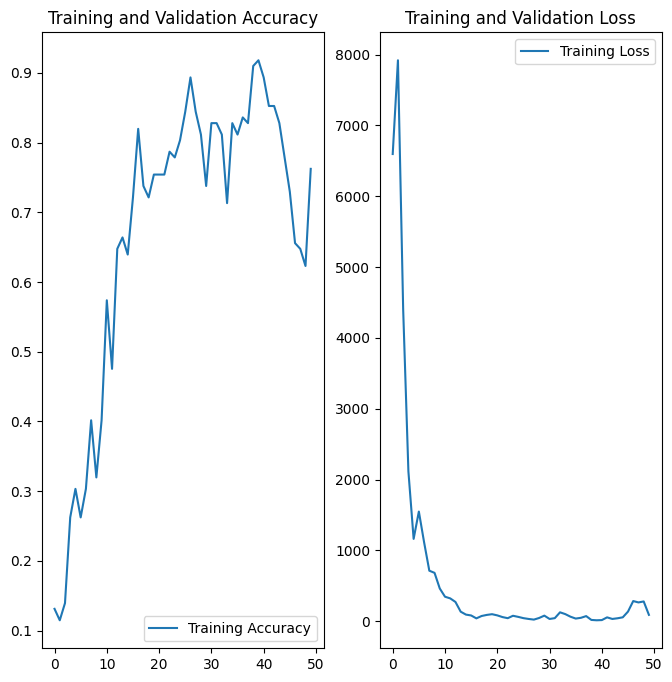

In [37]:
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']

loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
#plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
#plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [38]:
#tf.keras.utils.plot_model(model,to_file='rna.png', show_shapes=True,rankdir='LR')